In [91]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
data_2019 = pd.read_csv('2019_statcast_data_final.csv')
data_2018 = pd.read_csv('2018_statcast_data_final.csv')
data_2017 = pd.read_csv('2017_statcast_data_final.csv')
data_2016 = pd.read_csv('2016_statcast_data_final.csv')
data_2015 = pd.read_csv('2015_statcast_data_final.csv')

In [154]:
def launch_angle_avg_quartile(n):
    if(n >= q0 and n <= q1):
        return 1
    if(n >= q1 and n <=q2):
        return 2
    if(n >= q2 and n <= q3):
        return 3
    if(n >= q3 and n <= q4):
        return 4

# 2019

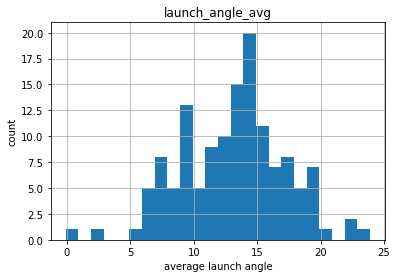

In [92]:
data_2019.hist(column='launch_angle_avg', bins = math.ceil(data_2019['launch_angle_avg'].max() - data_2019['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.show()

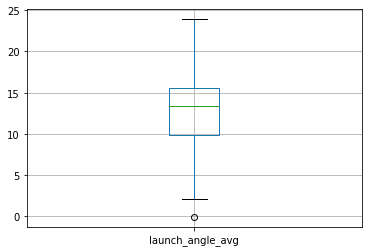

In [87]:
data_2019.boxplot(column='launch_angle_avg')
plt.show()

In [155]:
q0 = data_2019['launch_angle_avg'].quantile(0)
q1 = data_2019['launch_angle_avg'].quantile(0.25)
q2 = data_2019['launch_angle_avg'].quantile(0.5)
q3 = data_2019['launch_angle_avg'].quantile(0.75)
q4 = data_2019['launch_angle_avg'].quantile(1)

test = map(launch_angle_avg_quartile, data_2019['launch_angle_avg'])
test_list = list(test)

data_2019['launch_quartile'] = test_list

wRC+ Model
Predictor: launch angle
Regression Slope: 4.815587362541458
R-squared: 0.059275818153434856



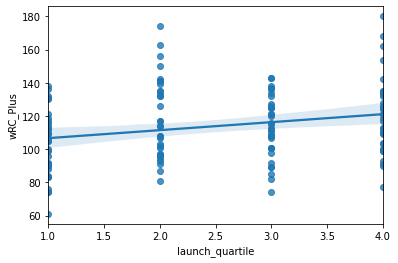

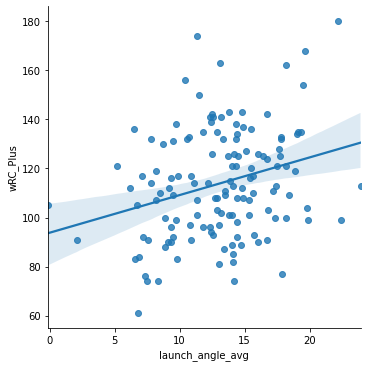

In [157]:
wRC_model_2019 = LinearRegression().fit(data_2019[['launch_quartile']], data_2019[['wRC_Plus']])
print('wRC+ Model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2019.coef_[0][0], wRC_model_2019.score(data_2019[['launch_quartile']], data_2019[['wRC_Plus']])))

sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2019)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019)
plt.show()

OPS+ model
Predictor: launch angle
Regression Slope: 4.892302321522083
R-squared: 0.06097813889573045



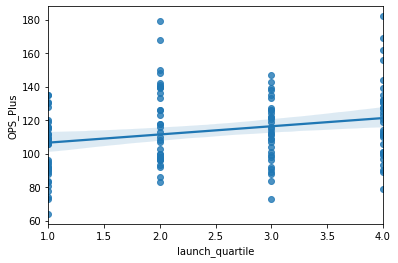

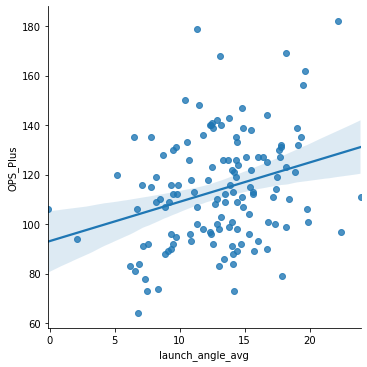

In [162]:
OPS_model_2019 = LinearRegression().fit(data_2019[['launch_quartile']], data_2019[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2019.coef_[0][0], OPS_model_2019.score(data_2019[['launch_quartile']], data_2019[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2019)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2019)
plt.show()

xWOBA model
Predictor: launch angle
Regression Slope: 0.007635887589457149
R-squared: 0.06608844901516497



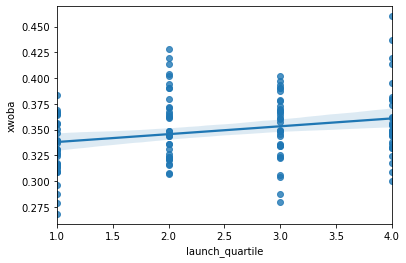

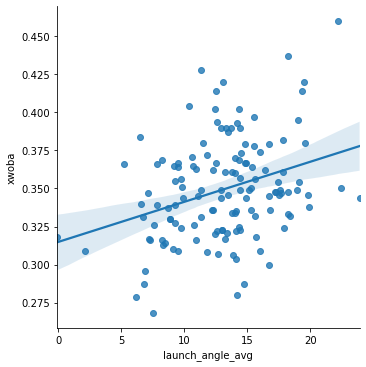

In [161]:
xWOBA_model_2019 = LinearRegression().fit(data_2019[['launch_quartile']], data_2019[['xwoba']])
print('xWOBA model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2019.coef_[0][0], xWOBA_model_2019.score(data_2019[['launch_quartile']], data_2019[['xwoba']])))

sns.regplot(x="launch_quartile", y="xwoba", data=data_2019)
plt.show()
sns.lmplot(x="launch_angle_avg", y="xwoba", data=data_2019)
plt.show()

In [77]:
#these plots mapped exit velocity to each quartile of launch angles and they all looked like scatterplots except one (2018 q3)

#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 3]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 4]);

# 2018

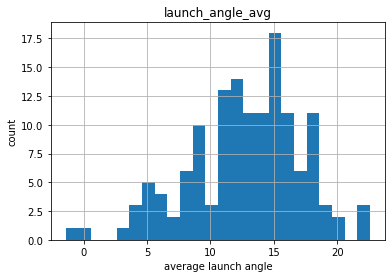

In [93]:
data_2018 = data_2018.head(139)
data_2018.hist(column='launch_angle_avg', bins = math.ceil(data_2018['launch_angle_avg'].max() - data_2018['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.show()

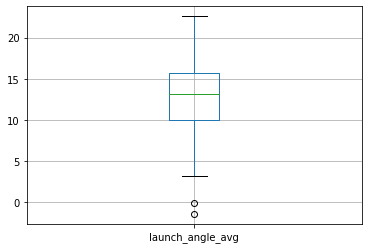

In [99]:
data_2018.boxplot(column='launch_angle_avg')
plt.show()

In [163]:
q0 = data_2018['launch_angle_avg'].quantile(0)
q1 = data_2018['launch_angle_avg'].quantile(0.25)
q2 = data_2018['launch_angle_avg'].quantile(0.5)
q3 = data_2018['launch_angle_avg'].quantile(0.75)
q4 = data_2018['launch_angle_avg'].quantile(1)

dummy_2018 = map(launch_angle_avg_quartile, data_2018['launch_angle_avg'])
dummy_2018 = list(dummy_2018)
data_2018['launch_quartile'] = dummy_2018

wRC+ model
Predictor: launch angle
Regression Slope: 3.885254194418684
R-squared: 0.03520633373651294



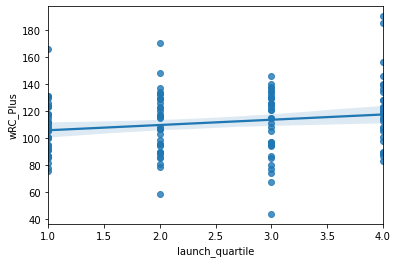

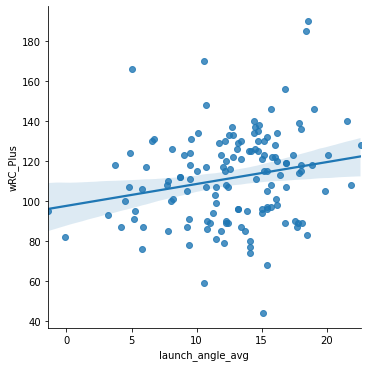

In [165]:
wRC_model_2018 = LinearRegression().fit(data_2018[['launch_quartile']], data_2018[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2018.coef_[0][0], wRC_model_2018.score(data_2018[['launch_quartile']], data_2018[['wRC_Plus']])))

sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2018)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2018)
plt.show()

OPS+ model
Predictor: launch angle
Regression Slope: 4.368982379226035
R-squared: 0.04563085094069752



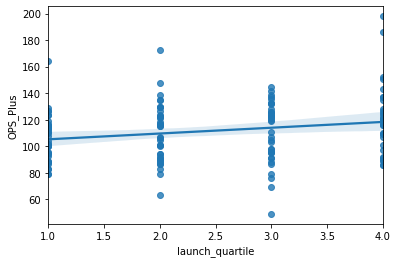

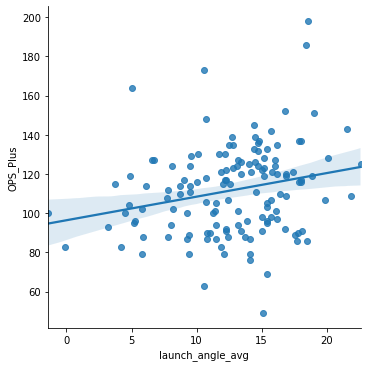

In [167]:
OPS_model_2018 = LinearRegression().fit(data_2018[['launch_quartile']], data_2018[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2018.coef_[0][0], OPS_model_2018.score(data_2018[['launch_quartile']], data_2018[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2018)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2018)
plt.show()

xWOBA model
Predictor: launch angle
Regression Slope: 0.005210564033386729
R-squared: 0.02948556707527006



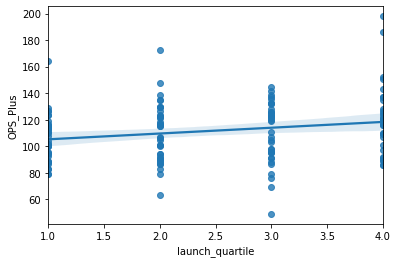

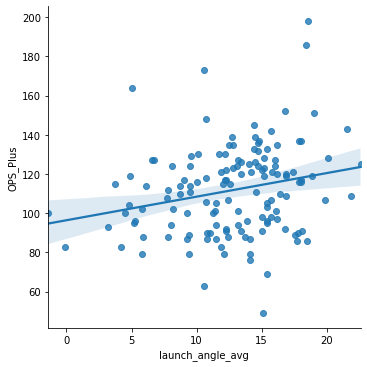

In [168]:
xWOBA_model_2018 = LinearRegression().fit(data_2018[['launch_quartile']], data_2018[['xwoba']])
print('xWOBA model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2018.coef_[0][0], xWOBA_model_2018.score(data_2018[['launch_quartile']], data_2018[['xwoba']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2018)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2018)
plt.show()

In [106]:
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 4]);

# This graph actually looks promising, could it shows that exit velocity only increases with certain launch angles (3rd quartile)

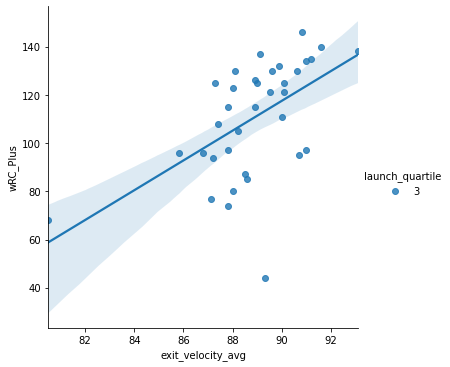

In [34]:
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 3]);

In [107]:
#data_2018[data_2018['launch_quartile'] == 3]

In [108]:
#this is how to do a regression with just the one quartile and exit velo

wRC_model_2018_test = LinearRegression().fit(data_2018[data_2018['launch_quartile'] == 3][['exit_velocity_avg']], data_2018[data_2018['launch_quartile'] == 3]['wRC_Plus'])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2018_test.coef_[0], wRC_model_2018_test.score(data_2018[data_2018['launch_quartile'] == 3][['exit_velocity_avg']], data_2018[data_2018['launch_quartile'] == 3]['wRC_Plus'])))

Predictor: launch angle
Regression Slope: 6.179710028836911
R-squared: 0.3029750723719338



# 2017

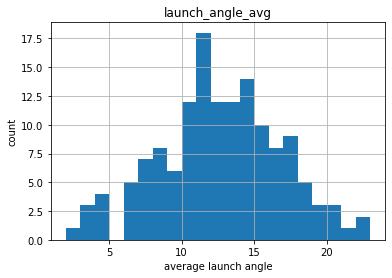

In [94]:
data_2017.hist(column='launch_angle_avg', bins = math.ceil(data_2017['launch_angle_avg'].max() - data_2017['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.show()

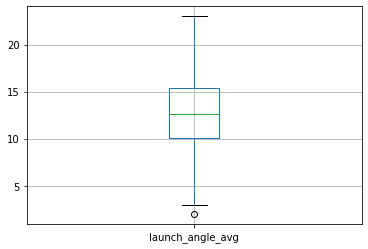

In [111]:
boxplot_2017 = data_2017.boxplot(column='launch_angle_avg')
plt.show()

In [118]:
q0 = data_2017['launch_angle_avg'].quantile(0)
q1 = data_2017['launch_angle_avg'].quantile(0.25)
q2 = data_2017['launch_angle_avg'].quantile(0.5)
q3 = data_2017['launch_angle_avg'].quantile(0.75)
q4 = data_2017['launch_angle_avg'].quantile(1)

dummy_2017 = map(launch_angle_avg_quartile, data_2017['launch_angle_avg'])
data_2017['launch_quartile'] = list(dummy_2017)
#data_2017.head()


wRC+ model
Predictor: launch angle
Regression Slope: 4.163613975681083
R-squared: 0.040187167377598976



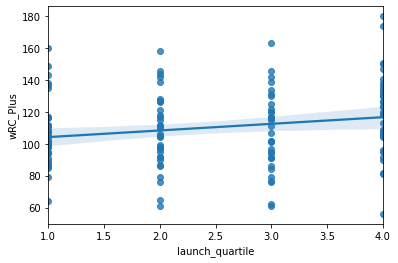

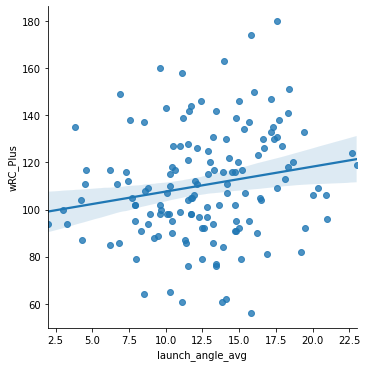

In [129]:
wRC_model_2017 = LinearRegression().fit(data_2017[['launch_quartile']], data_2017[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2017.coef_[0][0], wRC_model_2017.score(data_2017[['launch_quartile']], data_2017[['wRC_Plus']])))

sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2017)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2017)
plt.show()

OPS+ model
Predictor: launch angle
Regression Slope: 4.2139833769432045
R-squared: 0.04232233538716923



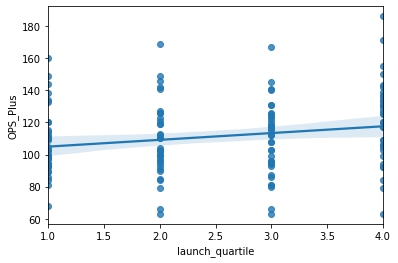

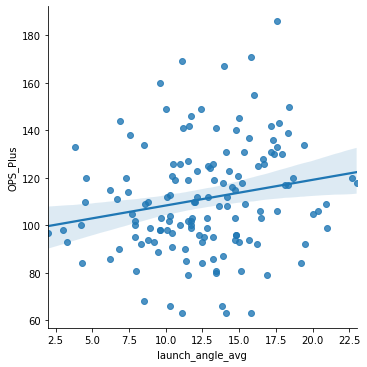

In [130]:
OPS_model_2017 = LinearRegression().fit(data_2017[['launch_quartile']], data_2017[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2017.coef_[0][0], OPS_model_2017.score(data_2017[['launch_quartile']], data_2017[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2017)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2017)
plt.show()

xWOBA model
Predictor: launch angle
Regression Slope: 0.005546136678466984
R-squared: 0.03357125713636788



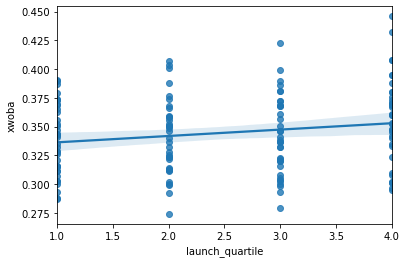

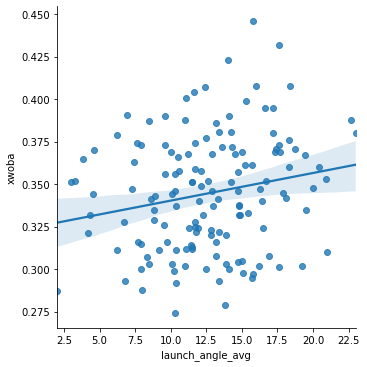

In [131]:
xWOBA_model_2017 = LinearRegression().fit(data_2017[['launch_quartile']], data_2017[['xwoba']])
print('xWOBA model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2017.coef_[0][0], xWOBA_model_2017.score(data_2017[['launch_quartile']], data_2017[['xwoba']])))

sns.regplot(x="launch_quartile", y="xwoba", data=data_2017)
plt.show()
sns.lmplot(x="launch_angle_avg", y="xwoba", data=data_2017)
plt.show()

In [115]:
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 3]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 4]);

# 2016

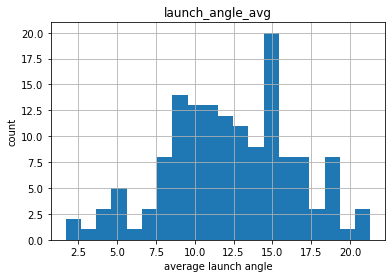

In [98]:
data_2016.hist(column='launch_angle_avg', bins = math.ceil(data_2016['launch_angle_avg'].max() - data_2016['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.show()

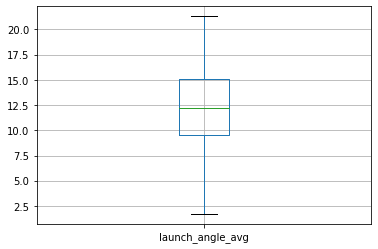

In [121]:
data_2016.boxplot(column='launch_angle_avg')
plt.show()

In [152]:
q0 = data_2016['launch_angle_avg'].quantile(0)
q1 = data_2016['launch_angle_avg'].quantile(0.25)
q2 = data_2016['launch_angle_avg'].quantile(0.5)
q3 = data_2016['launch_angle_avg'].quantile(0.75)
q4 = data_2016['launch_angle_avg'].quantile(1)

dummy_2016 = map(launch_angle_avg_quartile, data_2016['launch_angle_avg'])
data_2016['launch_quartile'] = list(dummy_2016)

wRC_model_2016 = LinearRegression().fit(data_2016[['launch_quartile']], data_2016[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2016.coef_[0][0], wRC_model_2016.score(data_2016[['launch_quartile']], data_2016[['wRC_Plus']])))

wRC+ model
Predictor: launch angle
Regression Slope: 4.24390243902439
R-squared: 0.05315623869002373



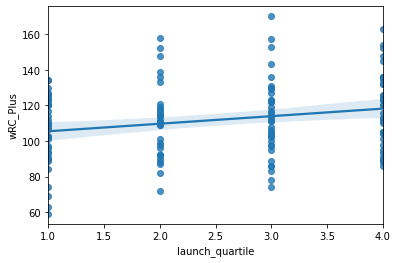

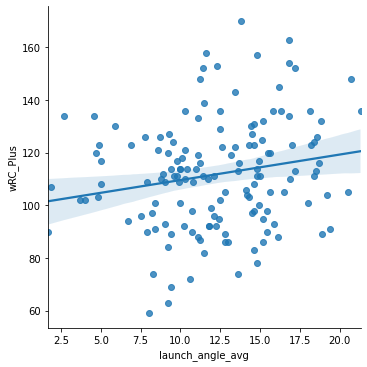

In [132]:
sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2016)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2016)
plt.show()

In [123]:
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 3]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 4]);

OPS+ model
Predictor: launch angle
Regression Slope: 4.303523035230351
R-squared: 0.05634515774470583



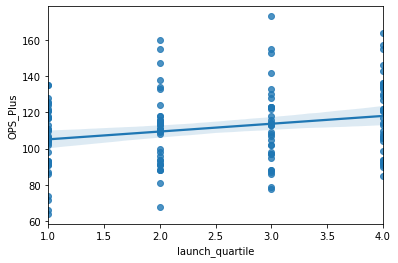

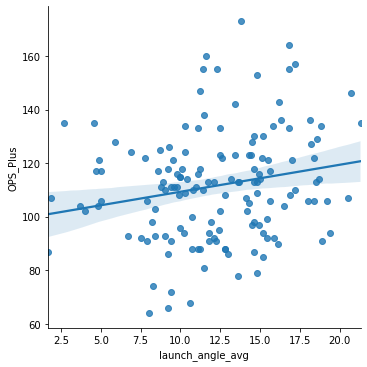

In [133]:
OPS_model_2016 = LinearRegression().fit(data_2016[['launch_quartile']], data_2016[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2016.coef_[0][0], OPS_model_2016.score(data_2016[['launch_quartile']], data_2016[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2016)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2016)
plt.show()

xWOBA model
Predictor: launch angle
Regression Slope: 0.006498644986449865
R-squared: 0.044705707479595014



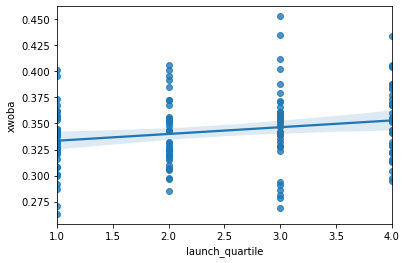

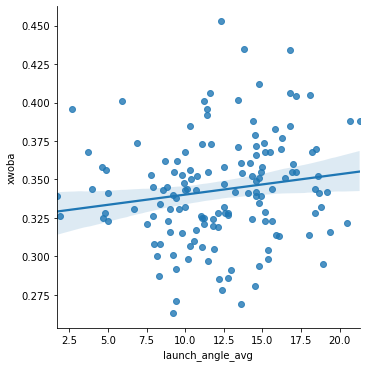

In [134]:
xWOBA_model_2016 = LinearRegression().fit(data_2016[['launch_quartile']], data_2016[['xwoba']])
print('xWOBA model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2016.coef_[0][0], xWOBA_model_2016.score(data_2016[['launch_quartile']], data_2016[['xwoba']])))

sns.regplot(x="launch_quartile", y="xwoba", data=data_2016)
plt.show()
sns.lmplot(x="launch_angle_avg", y="xwoba", data=data_2016)
plt.show()

# 2015

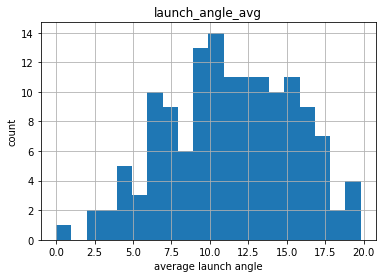

In [135]:
data_2015.hist(column='launch_angle_avg', bins = math.ceil(data_2015['launch_angle_avg'].max() - data_2015['launch_angle_avg'].min()))
plt.xlabel('average launch angle')
plt.ylabel('count')
plt.show()

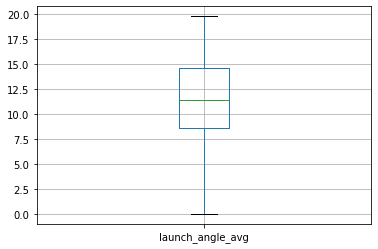

In [137]:
boxplot_2015 = data_2015.boxplot(column='launch_angle_avg')
plt.show()

In [138]:
q0 = data_2015['launch_angle_avg'].quantile(0)
q1 = data_2015['launch_angle_avg'].quantile(0.25)
q2 = data_2015['launch_angle_avg'].quantile(0.5)
q3 = data_2015['launch_angle_avg'].quantile(0.75)
q4 = data_2015['launch_angle_avg'].quantile(1)

dummy_2015 = map(launch_angle_avg_quartile, data_2015['launch_angle_avg'])
data_2015['launch_quartile'] = list(dummy_2015)

wRC+ model
Predictor: launch angle
Regression Slope: 5.04424568624347
R-squared: 0.05726549670818393



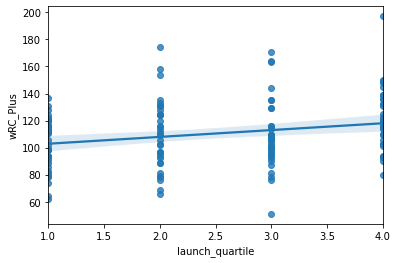

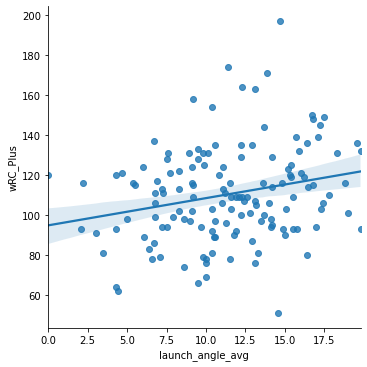

In [140]:
wRC_model_2015 = LinearRegression().fit(data_2015[['launch_quartile']], data_2015[['wRC_Plus']])
print('wRC+ model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2015.coef_[0][0], wRC_model_2015.score(data_2015[['launch_quartile']], data_2015[['wRC_Plus']])))

sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2015)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2015)
plt.show()

OPS+ model
Predictor: launch angle
Regression Slope: 5.049707139464936
R-squared: 0.060095140844858674



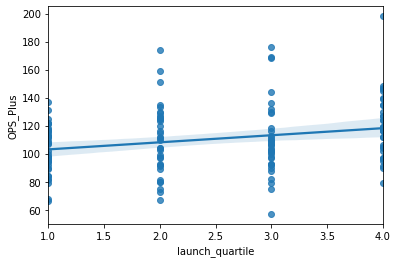

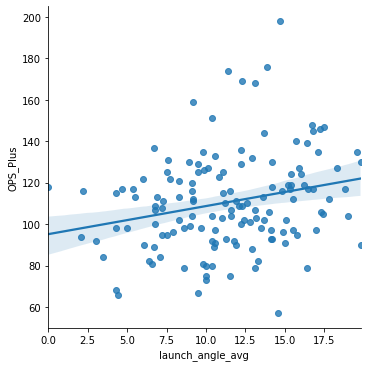

In [141]:
OPS_model_2015 = LinearRegression().fit(data_2015[['launch_quartile']], data_2015[['OPS_Plus']])
print('OPS+ model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(OPS_model_2015.coef_[0][0], OPS_model_2015.score(data_2015[['launch_quartile']], data_2015[['OPS_Plus']])))

sns.regplot(x="launch_quartile", y="OPS_Plus", data=data_2015)
plt.show()
sns.lmplot(x="launch_angle_avg", y="OPS_Plus", data=data_2015)
plt.show()

xWOBA model
Predictor: launch angle
Regression Slope: 0.009014445148013294
R-squared: 0.07367005936847748



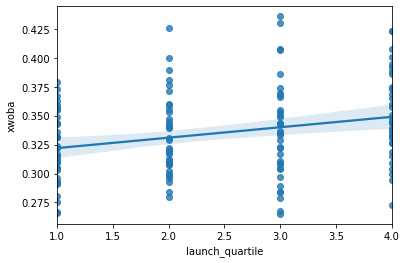

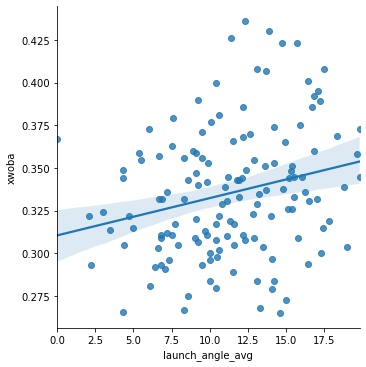

In [142]:
xWOBA_model_2015 = LinearRegression().fit(data_2015[['launch_quartile']], data_2015[['xwoba']])
print('xWOBA model\nPredictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(xWOBA_model_2015.coef_[0][0], xWOBA_model_2015.score(data_2015[['launch_quartile']], data_2015[['xwoba']])))

sns.regplot(x="launch_quartile", y="xwoba", data=data_2015)
plt.show()
sns.lmplot(x="launch_angle_avg", y="xwoba", data=data_2015)
plt.show()

# End of preregistered analysis

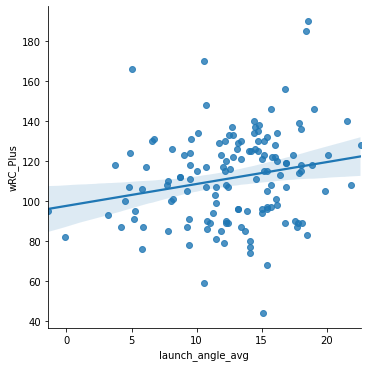

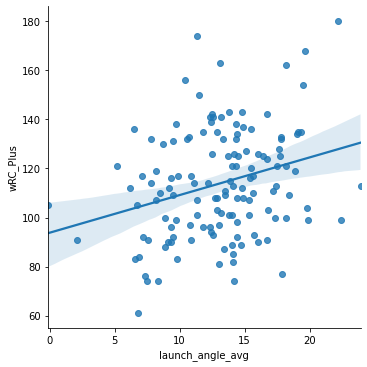

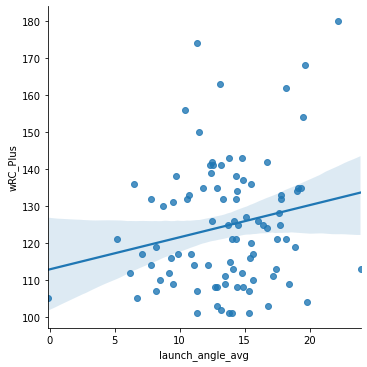

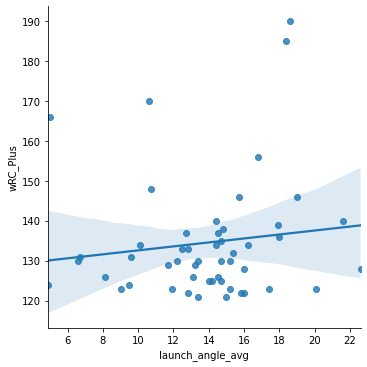

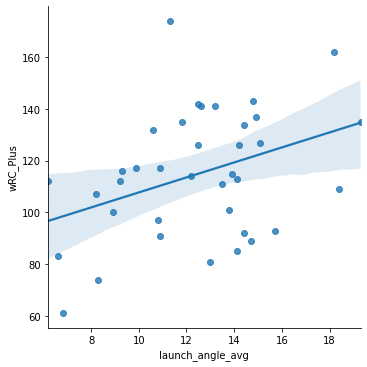

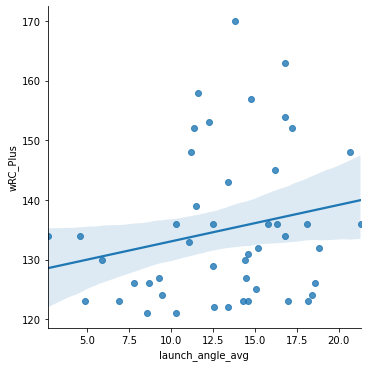

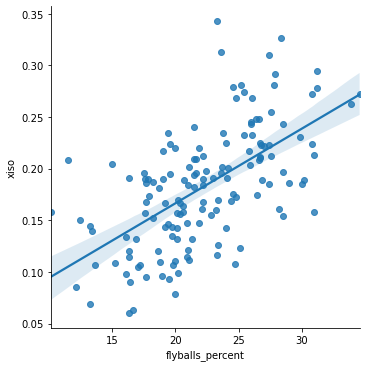

Predictor: launch angle
Regression Slope: 0.007212659476237146
R-squared: 0.3664535143326877



In [151]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2018)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019)
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019[data_2019['wRC_Plus'] > 100])
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2018[data_2018['wRC_Plus'] > 120])
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019[data_2017['wRC_Plus'] > 120])
plt.show()
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2016[data_2016['wRC_Plus'] > 120])
plt.show()
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2016)
plt.show()

flyballs_model_2016 = LinearRegression().fit(data_2016[['flyballs_percent']], data_2016[['xiso']])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2016.coef_[0][0], flyballs_model_2016.score(data_2016[['flyballs_percent']], data_2016[['xiso']])))

In [153]:
def launch_angle_avg_octile(n):
    if(n >= q0 and n <= q05):
        return 1
    if(n >= q05 and n <=q1):
        return 2
    if(n >= q1 and n <= q15):
        return 3
    if(n >= q15 and n <= q2):
        return 4
    if(n >= q2 and n <= q25):
        return 5
    if(n >= q25 and n <=q3):
        return 6
    if(n >= q3 and n <= q35):
        return 7
    if(n >= q35 and n <= q4):
        return 8

q0 = data_2016['launch_angle_avg'].quantile(0)
q05 = data_2016['launch_angle_avg'].quantile(0.125)
q1 = data_2016['launch_angle_avg'].quantile(0.25)
q15 = data_2016['launch_angle_avg'].quantile(0.375)
q2 = data_2016['launch_angle_avg'].quantile(0.5)
q25 = data_2016['launch_angle_avg'].quantile(0.625)
q3 = data_2016['launch_angle_avg'].quantile(0.75)
q35 = data_2016['launch_angle_avg'].quantile(0.875)
q4 = data_2016['launch_angle_avg'].quantile(1)

dummy_2016_octile = map(launch_angle_avg_octile, data_2016['launch_angle_avg'])
data_2016['launch_octile'] = list(dummy_2016_octile)

#wRC_model_2016_oct = LinearRegression().fit(data_2016[['launch_octile']], data_2016[['wRC_Plus']])
#print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model.coef_[0][0], wRC_model.score(data_2016[['launch_octile']], data_2016[['wRC_Plus']])))

#sns.regplot(x="launch_octile", y="wRC_Plus", data=data_2016);

#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 1]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 2]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 3]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 4]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 5]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 6]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 7]);
#sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 8]);